In [54]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2 
print( cv2.__version__)

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)


3.4.1


In [168]:
train_images = []       
train_labels = []
shape = (256,256)  
train_path = 'Heroes/'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(train_path + filename)
        window_name = 'image'
#         cv2.imshow(window_name, img)
#         cv2.waitKey(0)  
#         cv2.destroyAllWindows()
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        print("hello: " ,train_labels)
        
        # Resize all images to a specific shape
        
        img = cv2.resize(img, shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

hello:  ['Logan']
hello:  ['Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto', 'Magneto']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto', 'Magneto', 'Magneto']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto', 'Magneto', 'Magneto', 'Magneto']
hello:  ['Logan', 'Logan', 'Logan', 'Logan',

hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Storm', 'Storm', 'Storm', 'Storm', 'Storm', 'Storm', 'Storm']
hello:  ['Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Logan', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Magneto', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Mystique', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X', 'Professor X

In [169]:
# train_labels

In [170]:

test_images = []
test_labels = []
shape = (256,256)
test_path = 'test/'

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

In [171]:

len(test_labels)

3

In [172]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(256,256,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(5,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [173]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 252, 252, 30)      8670      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 126, 126, 30)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 124, 124, 30)      8130      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 62, 62, 30)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 60, 60, 30)        8130      
_________________________________________________________________
flatten_11 (Flatten)         (None, 108000)          

In [179]:
history = model.fit(x_train,y_train,epochs=5,batch_size=3,validation_data=(x_val,y_val))


Train on 36 samples, validate on 13 samples
Epoch 1/5
36/36 [==============================] - 9s 247ms/step - loss: 2.3667 - acc: 0.3056 - val_loss: 2.5202 - val_acc: 0.0000e+00
Epoch 2/5
36/36 [==============================] - 9s 255ms/step - loss: 2.6073 - acc: 0.3611 - val_loss: 3.5024 - val_acc: 0.2308
Epoch 3/5
36/36 [==============================] - 9s 243ms/step - loss: 3.4045 - acc: 0.2222 - val_loss: 4.2593 - val_acc: 0.1538
Epoch 4/5
36/36 [==============================] - 9s 240ms/step - loss: 4.5681 - acc: 0.4167 - val_loss: 6.2570 - val_acc: 0.0769
Epoch 5/5
36/36 [==============================] - 9s 242ms/step - loss: 2.2339 - acc: 0.3889 - val_loss: 2.4019 - val_acc: 0.1538


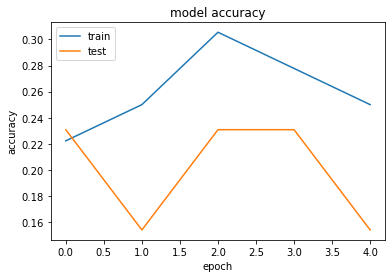

In [175]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [176]:
# !pip install matplotlib==3.1.3


In [178]:
checkImage = test_images[0:]
checklabel = test_labels[0:4]

predict = model.predict(np.array(checkImage))

output = { 0:'Logan',1:'Magneto',2:'Mystique',3:'Professor', 4: 'Storm'}

print("Actual :- ",checklabel)
print(predict) 
print("Predicted :- ",output[np.argmax(predict)%5])


Actual :-  ['Mystiquet', 'Mystiquet', 'Mystiquet']
[[0.26783547 0.27802205 0.4189179  0.00844008 0.02678452]
 [0.43856958 0.21970147 0.26017216 0.0445076  0.03704916]
 [0.46187383 0.13077435 0.40263948 0.00187237 0.00283995]]
Predicted :-  Logan


In [164]:
results = list()
for test_image, test_label in zip(test_images, test_labels):
    predict = model.predict(np.absarray(test_image))
    results.append(predict)
    
    print()

AttributeError: module 'numpy' has no attribute 'absarray'